In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import collections
from collections import defaultdict
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from nltk.corpus import stopwords

### Importando as bases

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_trump = pd.read_csv('/content/drive/MyDrive/projeto-womakerscode/hashtag_donaldtrump.csv', lineterminator='\n')
df_biden = pd.read_csv('/content/drive/MyDrive/projeto-womakerscode/hashtag_joebiden.csv', lineterminator='\n')

### Tratamento dos dados

In [ ]:
df_trump["Candidate"] = "TRUMP"
df_biden["Candidate"] = "BIDEN"

In [ ]:
# renomeia para US tudo que for Estados Unidos
df_trump['country']=df_trump['country'].replace({"United States of America" : "US", "United States" : "US"})
df_biden['country']=df_biden['country'].replace({"United States of America" : "US", "United States" : "US"})

In [ ]:
# seleciona apenas dados dos Estados Unidos
df_trump = df_trump[df_trump['country'] == 'US']
df_biden = df_biden[df_biden['country'] == 'US']

In [ ]:
# juntando dataframes
Data_Mixed = pd.concat([df_trump, df_biden])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head(3)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,US,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP


### Paleta de cores:


In [ ]:
# Trump e Biden
color_biden = '#014182'
color_trump = '#FF4040'

# Biden X Trump:
colors1 = [color_biden, color_trump]
colors_dict1 = {'BIDEN': color_biden, 'TRUMP': color_trump}

# Positivo X Negativo:
color_positive = 'limegreen'
color_negative ='#E50000'
color_neutral = 'darkgray'
colors_dict2 = {'positive': color_positive, 'negative': color_negative, 'Neutral': color_neutral}

# Cor comum para dados sobre ambos candidatos:
color_commom = '#29465b'

# Quantos tweets temos para cada candidato?

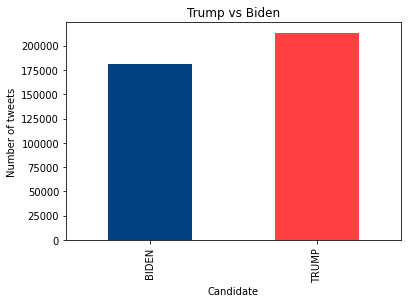

In [ ]:
# Quantos tweets temos para cada candidato?

Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar(color = colors1)
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # Remove notação científica
plt.show()

In [ ]:
total = Data_Mixed.groupby('Candidate')['tweet'].count()
total

Candidate
BIDEN    181137
TRUMP    213263
Name: tweet, dtype: int64

# Quantos likes temos para cada candidato?

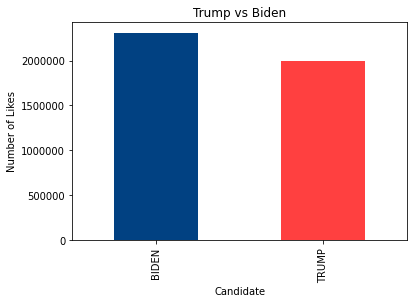

In [ ]:
# Total de likes para cada candidato

Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar(color = colors1)
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # Remove notação científica
plt.show()

#Embora o número de tweets para o
#Trump seja alto, o número de curtidas é alto para BIDEN

In [ ]:
soma = Data_Mixed.groupby('Candidate')['likes'].sum()
soma

Candidate
BIDEN    2310168.0
TRUMP    1990577.0
Name: likes, dtype: float64

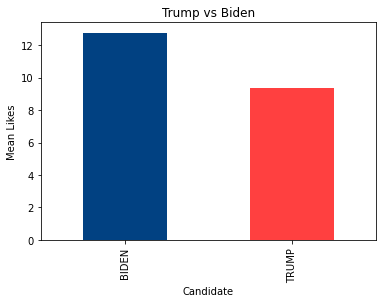

In [ ]:
# Média de likes para cada candidato

Data_Mixed.groupby('Candidate')['likes'].mean().plot.bar(color = colors1)
plt.ylabel('Mean Likes')
plt.title('Trump vs Biden')
plt.show()

In [ ]:
media = Data_Mixed.groupby('Candidate')['likes'].mean()
media

Candidate
BIDEN    12.753706
TRUMP     9.333907
Name: likes, dtype: float64

# Quantos likes temos para cada candidato por estado?

In [ ]:
# Lista dos 10 estados com maior numero de likes
top10likeStates = Data_Mixed.groupby('state')['likes'].count().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
#Contando o numero de likes por estado
likes_state_df = Data_Mixed.groupby(['state','Candidate'])['likes'].sum().sort_values(ascending=False).reset_index()
likes_state_df = likes_state_df[likes_state_df['state'].isin(top10likeStates)].reset_index()
likes_state_df

,index,state,Candidate,likes
0,0,New York,BIDEN,956368.0
1,1,New York,TRUMP,633898.0
2,2,District of Columbia,BIDEN,455685.0
3,3,District of Columbia,TRUMP,356192.0
4,4,California,TRUMP,153994.0
5,5,California,BIDEN,153064.0
6,6,Texas,BIDEN,102800.0
7,7,Texas,TRUMP,76712.0
8,8,Florida,BIDEN,57261.0
9,9,Florida,TRUMP,54242.0


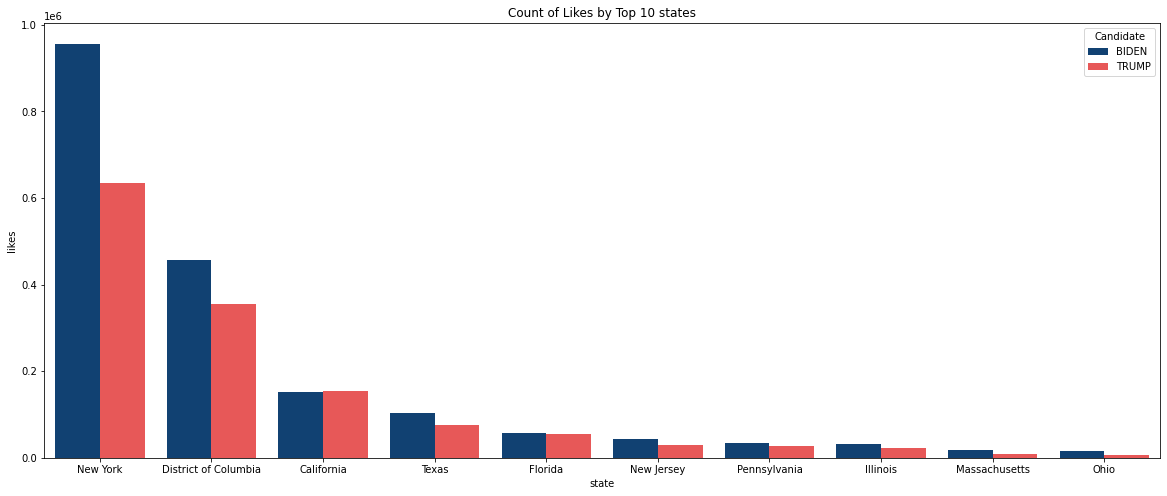

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=likes_state_df,x='state',y='likes',hue='Candidate', palette = colors_dict1).set(title='Count of Likes by Top 10 states')
plt.show()

# Paises que mais tweetaram?
(Parte do código antigo, de quando Data_Mixed tinha todos os países. Não rodar.)

In [ ]:
# renomeia para US tudo que for Estados Unidos
Data_Mixed['country']=Data_Mixed['country'].replace({"United States of America" : "US", "United States" : "US"})

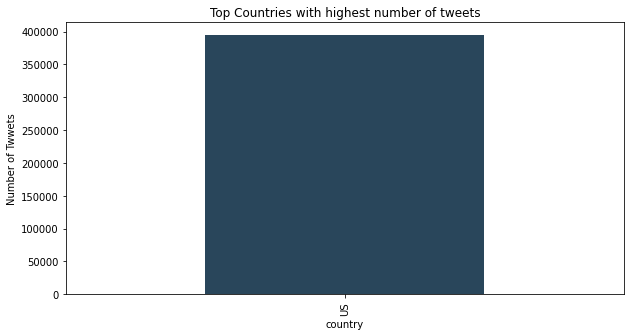

In [ ]:
# Paises com a maior quantidade de tweets

plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar(color = color_commom)
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show()

# Como esperado, mais Tweets são dos EUA, pois as eleições foram realizadas lá

# País que teve mais tweets por candidato?
(Parte do código antigo, de quando Data_Mixed tinha todos os países. Não rodar.)

In [ ]:
# Lista top 10 dos países com mais tweets
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()


In [ ]:
# Tweets por Biden e Trump em cada país
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().sort_values(ascending=False).reset_index()

tweet_dfs = tweet_df[tweet_df['country'].isin(top10Countries)]

tweet_dfs

,country,Candidate,tweet
0,US,TRUMP,213263
1,US,BIDEN,181137


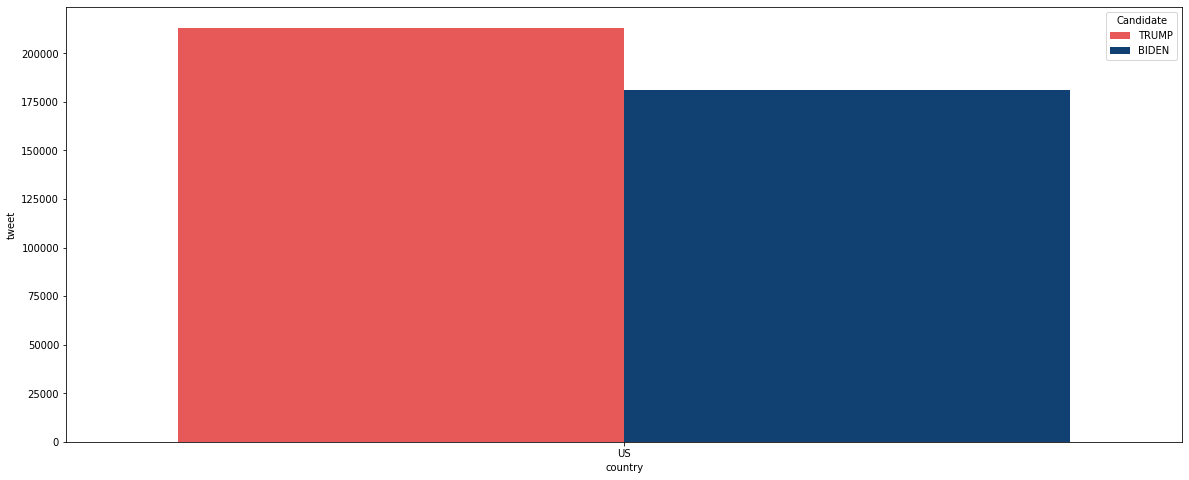

In [ ]:
#Top 10 top 10 dos países com mais tweets por Trump a Biden

plt.figure(figsize=(20,8))
colors_dict = {'BIDEN': '#014182', 'TRUMP': '#FF4040'}
sns.barplot(data=tweet_dfs,x='country',y='tweet',hue='Candidate', palette = colors_dict1)
plt.show()


#Exceto na Índia, a maioria dos países tuíta mais sobre Trump

# Quais estados tiveram mais tweets por candidato?

In [ ]:
# Lista dos 10 estados com maior numero de tweets
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
# Tweets por Biden e Trump em cada estado
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().sort_values(ascending=False).reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df.sort_values('state')

,state,Candidate,tweet
0,California,TRUMP,31149
1,California,BIDEN,25817
8,District of Columbia,TRUMP,9684
9,District of Columbia,BIDEN,7055
4,Florida,TRUMP,16559
7,Florida,BIDEN,13278
11,Illinois,TRUMP,6777
12,Illinois,BIDEN,5500
15,Massachusetts,TRUMP,4719
19,Massachusetts,BIDEN,3738


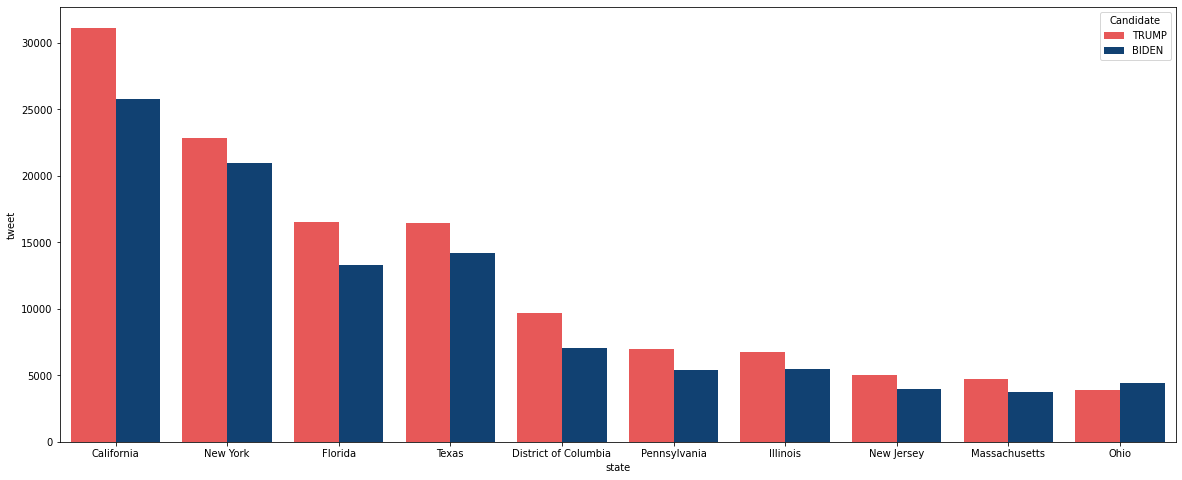

In [ ]:
#Top 10 estados que mais tem Tweet

plt.figure(figsize=(20,8))
sns.barplot(data=state_df, x='state', y='tweet', hue='Candidate', palette = colors_dict1)
plt.show()

#Mesmo aqui os tweets são mais para Trump do que para Biden

In [ ]:
state_df = Data_Mixed.dropna(subset=['state_code']).groupby(['state_code','Candidate'])['tweet'].count().reset_index()
state_df = state_df.set_index(['Candidate', 'state_code']).unstack(level=0)

def getDiff(state):
    total = state[1] + state[0]
    diff = state[1] - state[0]  # trump - biden

    return diff/total

state_df = state_df.apply(getDiff, axis=1).reset_index().rename({0: 'diff'}, axis=1)


In [ ]:
fig = px.choropleth(state_df,
                    locations='state_code',
                    locationmode="USA-states",
                    scope='usa',
                    color='diff',
                    color_continuous_scale=(color_biden, color_trump),
                    range_color=(-0.1,0.1),
                    color_continuous_midpoint=0,
                    )
fig.show()

# Quais candidatos foram mais citados por Estado?

In [ ]:
#Quantidade de tweets da base que mencionam Trump
#Criei um sub dataset que contém apenas tweets que a palavra Trump aparece e conto o tamanho desse sub dataset
trump_mention = Data_Mixed.loc[Data_Mixed['tweet'].str.contains("Trump", case=False)]
trump_mention.shape[0]

288989

In [ ]:
#Quantidade de tweets da base que mencionam Biden
biden_mention = Data_Mixed.loc[Data_Mixed['tweet'].str.contains("Biden", case=False)]
biden_mention.shape[0]

250809

In [ ]:
#Agrupando as menções do Trump pelas 10 estados com mais tweets
trump_mention_bs = trump_mention.groupby(['state'])['tweet'].count().sort_values(ascending = False).reset_index().head(10)
trump_mention_bs

,state,tweet
0,California,41700
1,New York,32026
2,Texas,22291
3,Florida,21933
4,District of Columbia,12845
5,Pennsylvania,9090
6,Illinois,8951
7,New Jersey,6657
8,Massachusetts,6172
9,Ohio,6071


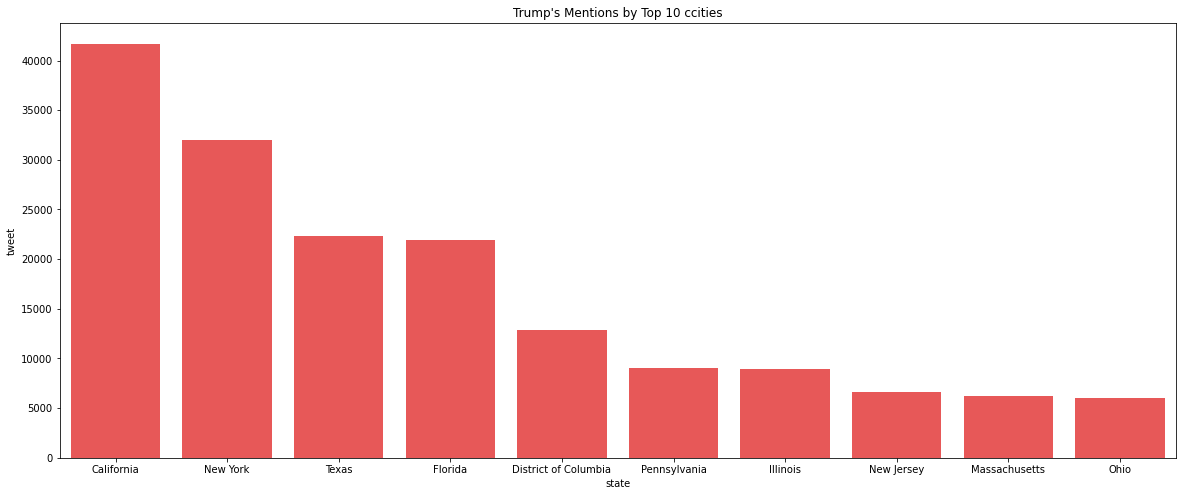

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=trump_mention_bs,x='state',y='tweet', color = color_trump).set(title="Trump's Mentions by Top 10 ccities")
plt.show()

In [ ]:
#Agrupando as menções do Biden pelas 10 cidades com mais tweets
biden_mention_bs = biden_mention.groupby(['city', 'state'])['tweet'].count().sort_values(ascending = False).reset_index().head(10)
biden_mention_bs

,city,state,tweet
0,New York,New York,24990
1,Los Angeles,California,10767
2,Washington,District of Columbia,10292
3,Chicago,Illinois,4890
4,San Francisco,California,3421
5,Atlanta,Georgia,3299
6,Houston,Texas,3164
7,Miami,Florida,2967
8,Boston,Massachusetts,2861
9,Philadelphia,Pennsylvania,2583


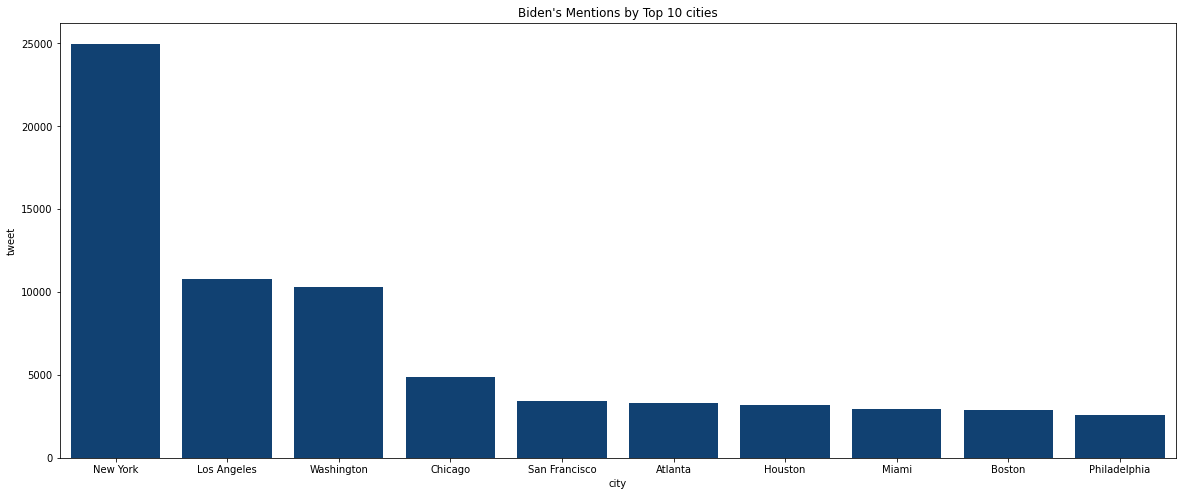

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(data=biden_mention_bs,x='city',y='tweet', color = color_biden).set(title="Biden's Mentions by Top 10 cities")
plt.show()

# Quantidade de tweets nos Swing States?

In [ ]:
# Lista Swing States

swingStates = ['Colorado',
                'Florida',
                'Iowa',
                'Michigan',
                'Nevada',
                'New Hampshire',
                'North Carolina',
                'Ohio',
                'Pennsylvania',
                'Virginia',
                'Wisconsin']

#https://www.polyas.com/election-glossary/swing-states

In [ ]:
# Contagem de tweets por estado:

swingStates_df = Data_Mixed[Data_Mixed['country']=='US'].groupby(['state','Candidate'])['tweet'].count().sort_values(ascending=False).reset_index()

# Seleção de dados dos Swing States:

swingStates_df = swingStates_df[swingStates_df['state'].isin(swingStates)]

swingStates_df

,state,Candidate,tweet
4,Florida,TRUMP,16559
7,Florida,BIDEN,13278
10,Pennsylvania,TRUMP,7011
13,Pennsylvania,BIDEN,5403
16,Ohio,BIDEN,4413
18,Ohio,TRUMP,3871
20,Colorado,TRUMP,3618
21,North Carolina,TRUMP,3415
25,Michigan,BIDEN,3074
26,North Carolina,BIDEN,3054


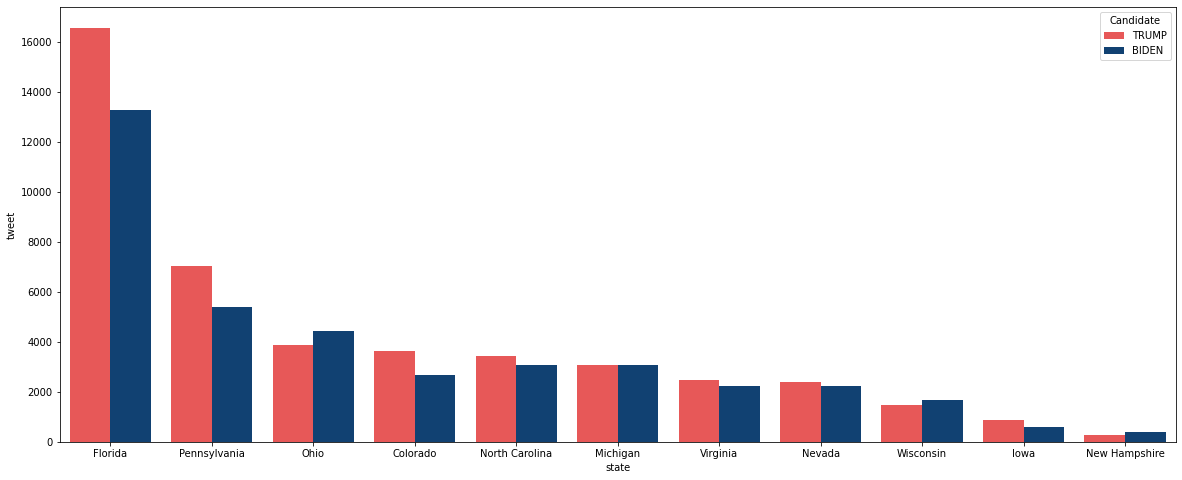

In [ ]:
# Tweets por Trump a Biden nos Swing states

plt.figure(figsize=(20,8))
sns.barplot(data = swingStates_df, x='state', y='tweet',hue='Candidate', palette = colors_dict1)
plt.show()

# Sentimentos dos tweets por candidato

In [ ]:
def find_pol(review): ## função polarity que avalia o sentimento de cada tweet
    return TextBlob(review).sentiment.polarity

In [ ]:
# cria uma nova tabela
trump = df_trump[["Candidate","user_id","tweet","state","country"]]
biden = df_biden[["Candidate","user_id","tweet", "state","country"]]

In [ ]:
trump["Sentiment Polarity"] = trump["tweet"].apply(find_pol)
trump.tail()

biden["Sentiment Polarity"] = biden["tweet"].apply(find_pol)
biden.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,user_id,tweet,state,country,Sentiment Polarity
776861,BIDEN,9.538012e+17,#election #2020Elections #trump #biden https:/...,New York,US,0.000000
776862,BIDEN,2.975783e+09,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,Massachusetts,US,0.100000
776865,BIDEN,5.545625e+07,@FLOTUS I’m excited to have a FLOTUS whose vag...,District of Columbia,US,0.375000
776870,BIDEN,1.248047e+18,The man needs some help...#usa #biden\nWhen wi...,Idaho,US,0.000000
776872,BIDEN,9.868225e+17,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,Minnesota,US,-0.025379


In [ ]:
trump["Expression Label"] = np.where(trump["Sentiment Polarity"]>0, "positive", "negative")
trump["Expression Label"][trump["Sentiment Polarity"]==0]="Neutral"
trump.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,user_id,tweet,state,country,Sentiment Polarity,Expression Label
970893,TRUMP,1.237758e+18,@DonaldJTrumpJr Being a #tRump you are intimat...,New Jersey,US,-0.312500,negative
970895,TRUMP,4.835231e+07,Have you know decency #Trump @GOP? Do you kno...,New York,US,-0.200000,negative
970897,TRUMP,9.868225e+17,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,Minnesota,US,-0.025379,negative
970900,TRUMP,1.296581e+18,#Trump #Patriots #MAGA2020 https://t.co/2A8Fnm...,Texas,US,0.000000,Neutral
970905,TRUMP,2.842344e+07,"Again with the lying, cheating, b.s. #LoserTru...",Kansas,US,0.000000,Neutral


In [ ]:
biden["Expression Label"] = np.where(biden["Sentiment Polarity"]>0, "positive", "negative")
biden["Expression Label"][biden["Sentiment Polarity"]==0]="Neutral"
biden.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Candidate,user_id,tweet,state,country,Sentiment Polarity,Expression Label
776861,BIDEN,9.538012e+17,#election #2020Elections #trump #biden https:/...,New York,US,0.000000,Neutral
776862,BIDEN,2.975783e+09,@GOP @GOPLeader @senatemajldr @LindseyGrahamSC...,Massachusetts,US,0.100000,positive
776865,BIDEN,5.545625e+07,@FLOTUS I’m excited to have a FLOTUS whose vag...,District of Columbia,US,0.375000,positive
776870,BIDEN,1.248047e+18,The man needs some help...#usa #biden\nWhen wi...,Idaho,US,0.000000,Neutral
776872,BIDEN,9.868225e+17,LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...,Minnesota,US,-0.025379,negative


In [ ]:
#grafico Trump

new1 = trump.groupby('Expression Label').count()
x = list(new1['Sentiment Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = color_neutral
df['color'][1] = color_negative
df['color'][2] = color_positive

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Biden

new1 = biden.groupby('Expression Label').count()
x = list(new1['Sentiment Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = color_neutral
df['color'][1] = color_negative
df['color'][2] = color_positive

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Comparando proporções para cada candidato

In [ ]:
count_1 = trump.groupby('Expression Label').count()
print(count_1)

neutral_per1 = (count_1['Sentiment Polarity'][0]/trump.shape[0])*100
negative_per1 = (count_1['Sentiment Polarity'][1]/trump.shape[0])*100
positive_per1 = (count_1['Sentiment Polarity'][2]/trump.shape[0])*100

count_2 = biden.groupby('Expression Label').count()
print(count_2)

neutral_per2 = (count_2['Sentiment Polarity'][0]/biden.shape[0])*100
negative_per2 = (count_2['Sentiment Polarity'][1]/biden.shape[0])*100
positive_per2 = (count_2['Sentiment Polarity'][2]/biden.shape[0])*100

sentimentos = ['Positive', 'Negative', 'Neutral']

lis_trump = [positive_per1, negative_per1, neutral_per1]
lis_biden = [positive_per2, negative_per2, neutral_per2]


fig = go.Figure(data=[
    go.Bar(name='Trump', x=sentimentos, y=lis_trump, marker_color = color_trump),
    go.Bar(name='Biden', x=sentimentos, y=lis_biden, marker_color = color_biden),

])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

                  Candidate  user_id  tweet  state  country  \
Expression Label                                              
Neutral               88386    88386  88386  73694    88386   
negative              47791    47791  47791  40420    47791   
positive              77086    77086  77086  64773    77086   

                  Sentiment Polarity  
Expression Label                      
Neutral                        88386  
negative                       47791  
positive                       77086  
                  Candidate  user_id  tweet  state  country  \
Expression Label                                              
Neutral               81707    81707  81707  69419    81707   
negative              30733    30733  30733  25504    30733   
positive              68697    68697  68697  58657    68697   

                  Sentiment Polarity  
Expression Label                      
Neutral                        81707  
negative                       30733  
positive         

## Sentimento dos tweets por candidato em cada estado
Visualização 2

In [ ]:
# juntando os dataframes trump e biden, que possuem apenas sentimentos positivos e negativos, para identificar os 10 estados que serão representados graficamente
Data_Mixed_sentimentos = pd.concat([trump, biden])
Data_Mixed_sentimentos.groupby(['state']).count().sort_values(ascending=False, by='tweet').reset_index().head(10)

,state,Candidate,user_id,tweet,country,Sentiment Polarity,Expression Label
0,California,56966,56966,56966,56966,56966,56966
1,New York,43886,43886,43886,43886,43886,43886
2,Texas,30682,30682,30682,30682,30682,30682
3,Florida,29837,29837,29837,29837,29837,29837
4,District of Columbia,16739,16739,16739,16739,16739,16739
5,Pennsylvania,12414,12414,12414,12414,12414,12414
6,Illinois,12277,12277,12277,12277,12277,12277
7,New Jersey,9006,9006,9006,9006,9006,9006
8,Massachusetts,8457,8457,8457,8457,8457,8457
9,Ohio,8284,8284,8284,8284,8284,8284


In [ ]:
# Criando a função para criação dos gráficos de sentimentos positivos e negativos dos candidatos por estado

def plot_info(var):
  count_1 = trump[trump['state'] == var]
  count_2 = trump[trump['state'] == var].groupby('Expression Label').count()

  neutral_per1 = (count_2['Sentiment Polarity'][0]/count_1.shape[0])*100
  negative_per1 = (count_2['Sentiment Polarity'][1]/count_1.shape[0])*100
  positive_per1 = (count_2['Sentiment Polarity'][2]/count_1.shape[0])*100

  count_3 = biden[biden['state'] == var]
  count_4 = biden[biden['state'] == var].groupby('Expression Label').count()

  neutral_per2 = (count_4['Sentiment Polarity'][0]/count_3.shape[0])*100
  negative_per2 = (count_4['Sentiment Polarity'][1]/count_3.shape[0])*100
  positive_per2 = (count_4['Sentiment Polarity'][2]/count_3.shape[0])*100

  sentimentos = ['Positive', 'Negative', "Neutral"]

  lis_trump = [positive_per1, negative_per1, neutral_per1]
  lis_biden = [positive_per2, negative_per2, neutral_per2]

  fig = go.Figure(data=[
    go.Bar(name='Trump', x=sentimentos, y=lis_trump, marker_color = color_trump),
    go.Bar(name='Biden', x=sentimentos, y=lis_biden, marker_color = color_biden),])

  # Change the bar mode
  fig.update_layout(width=600, height=500,title_text= var, barmode='group')
  fig.update_yaxes(range = [0,60])
  fig.show()

In [ ]:
# criando uma lista com a porcentagem de sentimentos positivos e negativos por estado
List_states_sentimentos = ['California',
               'New York',
               'Texas',
               'Florida',
               'District of Columbia',
               'Pennsylvania',
               'Illinois',
               'New Jersey',
               'Massachusetts',
               'Ohio']

for state in List_states_sentimentos:
  plot_info(state)

Descartando todos os tweets com polaridade neutra de ambos os conjuntos de dados para plotar gráfico de dispersão melhor.

In [ ]:
# Trump
reviews1= trump[trump['Sentiment Polarity'] == 0.0000]
print(reviews1.shape)

cond1= trump['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
trump.drop(trump[cond1].index, inplace = True)
print(trump.shape)


(88386, 7)
(124877, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Biden
reviews2= biden[biden['Sentiment Polarity'] == 0.0000]
print(reviews2.shape)

cond2= biden['Sentiment Polarity'].isin(reviews1['Sentiment Polarity'])
biden.drop(biden[cond2].index, inplace = True)
print(biden.shape)

(81707, 7)
(99430, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribuição do sentimento por candidato

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



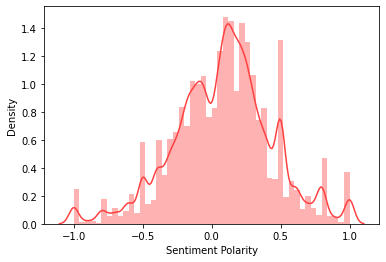

In [ ]:
#trump
sns.distplot(trump['Sentiment Polarity'], color =  '#FF4040')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



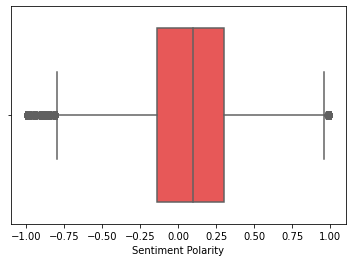

In [ ]:
sns.boxplot(trump['Sentiment Polarity'],  color =  '#FF4040')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



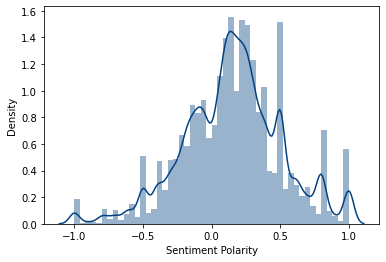

In [ ]:
#biden
sns.distplot(biden['Sentiment Polarity'], color = '#014182')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



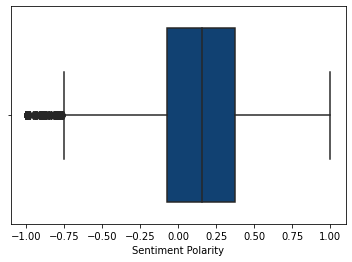

In [ ]:
sns.boxplot(biden['Sentiment Polarity'], color = '#014182')
plt.show()

In [ ]:
count_1 = trump.groupby('Expression Label').count()
print(count_1)

negative_per1 = (count_1['Sentiment Polarity'][0]/trump.shape[0])*100
positive_per1 = (count_1['Sentiment Polarity'][1]/trump.shape[0])*100

count_2 = biden.groupby('Expression Label').count()
print(count_2)

negative_per2 = (count_2['Sentiment Polarity'][0]/biden.shape[0])*100
positive_per2 = (count_2['Sentiment Polarity'][1]/biden.shape[0])*100

sentimentos = ['Positive', 'Negative', 'Neutral']

lis_trump = [positive_per1, negative_per1]
lis_biden = [positive_per2, negative_per2]


fig = go.Figure(data=[
    go.Bar(name='Trump', x=sentimentos, y=lis_trump, marker_color = color_trump),
    go.Bar(name='Biden', x=sentimentos, y=lis_biden, marker_color = color_biden),

])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

                  Candidate  user_id  tweet  state  country  \
Expression Label                                              
negative              47791    47791  47791  40420    47791   
positive              77086    77086  77086  64773    77086   

                  Sentiment Polarity  
Expression Label                      
negative                       47791  
positive                       77086  
                  Candidate  user_id  tweet  state  country  \
Expression Label                                              
negative              30733    30733  30733  25504    30733   
positive              68697    68697  68697  58657    68697   

                  Sentiment Polarity  
Expression Label                      
negative                       30733  
positive                       68697  


# Sentimento dos tweets por candidato em cada estado
Visualização 1


In [ ]:
# Lista dos estados com mais tweets apresentando sentimentos positivos e negativos para ambos os candidatos
List_states_sentimentos = ['California',
               'New York',
               'Florida',
               'Texas',
               'District of Columbia',
               'Pennsylvania',
               'Illinois',
               'Massachusetts',
               'New Jersey',
               'Ohio']

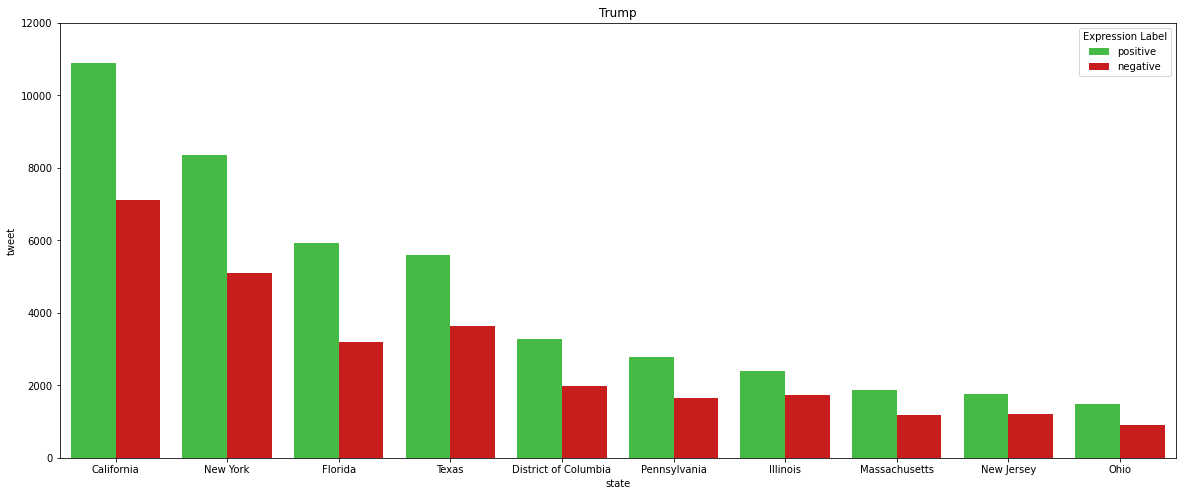

In [ ]:
# analisando o número de sentimentos positivos e negativos do Trump por estado
count_3 = trump.groupby(['state','Expression Label']).count().sort_values(ascending=False, by= 'tweet').reset_index()

count_3 = count_3[count_3['state'].isin(List_states_sentimentos)]

plt.figure(figsize=(20,8))
sns.barplot(data=count_3,x='state',y='tweet', hue='Expression Label', palette = colors_dict2)
plt.title('Trump')
plt.yticks(np.arange(0, 14000, 2000))
plt.show()

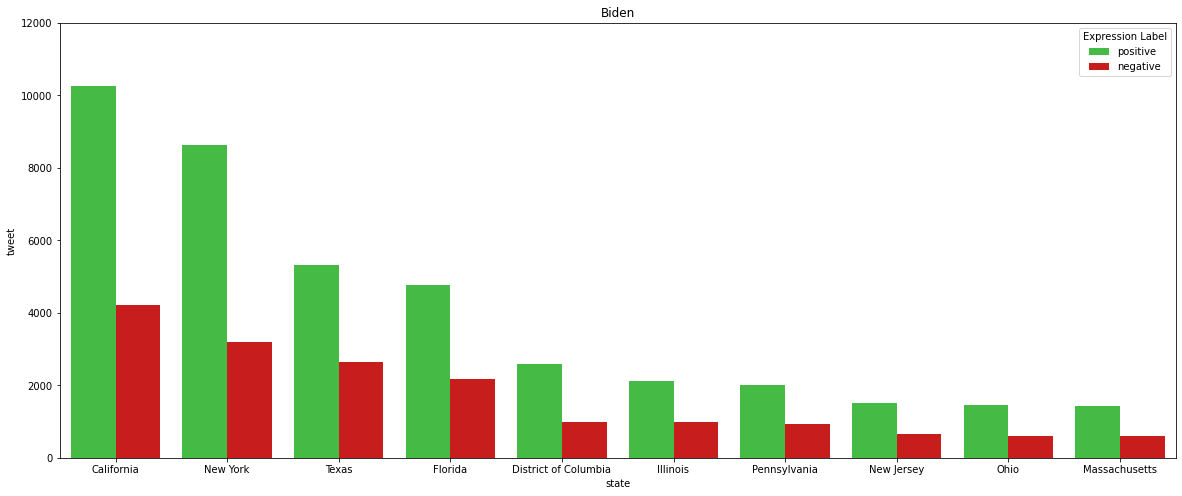

In [ ]:
# analisando o número de sentimentos positivos e negativos do Biden por estado
count_4 = biden.groupby(['state','Expression Label']).count().sort_values(ascending=False, by= 'tweet').reset_index()

count_4 = count_4[count_4['state'].isin(List_states_sentimentos)]

plt.figure(figsize=(20,8))
sns.barplot(data=count_4,x='state',y='tweet', hue='Expression Label', palette = colors_dict2)
plt.title('Biden')
plt.yticks(np.arange(0, 14000, 2000))
plt.show()

# Sentimento dos tweets com mais likes

In [ ]:
# 99º percentil

Q99_trump = np.percentile(df_trump.sort_values(by="likes", ascending=False)["likes"], 99)
Q99_biden = np.percentile(df_biden.sort_values(by="likes", ascending=False)["likes"], 99)
print(f'Q99 biden: {Q99_biden}\nQ99 Trump: {Q99_trump}')
# 99% dos dados do trump possui até 98 likes
# 99% dos dados do biden possui até 117 likes

Q99 biden: 141.0
Q99 Trump: 94.0


In [ ]:
print(f'Quantidade de tweets equivalentes a 1%:\nTrump: {math.ceil(0.01*df_trump.shape[0])}\nBiden: {math.ceil(0.01*df_biden.shape[0])}')

Quantidade de tweets equivalentes a 1%:
Trump: 2133
Biden: 1812


In [ ]:
# Selecionando 1% dos comentários com mais likes
import math
df_trump_top_likes = df_trump.sort_values(by="likes", ascending=False).head(math.ceil(0.01*df_trump.shape[0]))
df_biden_top_likes = df_biden.sort_values(by="likes", ascending=False).head(math.ceil(0.01*df_biden.shape[0]))

In [ ]:
# cria uma nova tabela
trump_top_likes = df_trump_top_likes[["user_id","tweet"]]
biden_top_likes = df_biden_top_likes[["user_id","tweet"]]

In [ ]:
# Criando coluna com sentimentos
trump_top_likes["Sentiment Polarity"] = trump_top_likes["tweet"].apply(find_pol)
trump_top_likes.tail()

biden_top_likes["Sentiment Polarity"] = biden_top_likes["tweet"].apply(find_pol)
biden_top_likes.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,user_id,tweet,Sentiment Polarity
75118,2.858792e+07,"Pretty important topic to be dodging, Joe. #Hu...",0.325
256134,2.415815e+08,@realDonaldTrump #JoeBiden will #MakeAmericaGr...,0.000
316622,1.697272e+07,Who is voting in person for #JoeBiden on #Elec...,0.000
764869,1.283703e+08,Biden is President! \n\nPS: So was Al Gore...\...,0.000
264874,8.178251e+17,#Biden team cancels #Texas event after highway...,0.500


In [ ]:
# Criando coluna com classificação do sentimento
trump_top_likes["Expression Label"] = np.where(trump_top_likes["Sentiment Polarity"]>0, "positive", "negative")
trump_top_likes["Expression Label"][trump_top_likes["Sentiment Polarity"]==0]="Neutral"
trump_top_likes.tail()

biden_top_likes["Expression Label"] = np.where(biden_top_likes["Sentiment Polarity"]>0, "positive", "negative")
biden_top_likes["Expression Label"][biden_top_likes["Sentiment Polarity"]==0]="Neutral"
biden_top_likes.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel

,user_id,tweet,Sentiment Polarity,Expression Label
75118,2.858792e+07,"Pretty important topic to be dodging, Joe. #Hu...",0.325,positive
256134,2.415815e+08,@realDonaldTrump #JoeBiden will #MakeAmericaGr...,0.000,Neutral
316622,1.697272e+07,Who is voting in person for #JoeBiden on #Elec...,0.000,Neutral
764869,1.283703e+08,Biden is President! \n\nPS: So was Al Gore...\...,0.000,Neutral
264874,8.178251e+17,#Biden team cancels #Texas event after highway...,0.500,positive


In [ ]:
# Grafico Trump

new1 = trump_top_likes.groupby('Expression Label').count()
x = list(new1['Sentiment Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = color_neutral
df['color'][1] = color_negative
df['color'][2] = color_positive

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Gráfico Biden

new1 = biden_top_likes.groupby('Expression Label').count()
x = list(new1['Sentiment Polarity'])
y = list(new1.index)
tuple_list = list(zip(x,y))

df = pd.DataFrame(tuple_list, columns=['x','y'])

df['color'] = color_neutral
df['color'][1] = color_negative
df['color'][2] = color_positive

import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=df['x'],
                y=df['y'],
                orientation ='h',
                marker={'color': df['color']}))
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
count_1 = trump_top_likes.groupby('Expression Label').count()
print(count_1)

neutral_per1 = (count_1['Sentiment Polarity'][0]/trump_top_likes.shape[0])*100
negative_per1 = (count_1['Sentiment Polarity'][1]/trump_top_likes.shape[0])*100
positive_per1 = (count_1['Sentiment Polarity'][2]/trump_top_likes.shape[0])*100

count_2 = biden_top_likes.groupby('Expression Label').count()
print(count_2)

neutral_per2 = (count_2['Sentiment Polarity'][0]/biden_top_likes.shape[0])*100
negative_per2 = (count_2['Sentiment Polarity'][1]/biden_top_likes.shape[0])*100
positive_per2 = (count_2['Sentiment Polarity'][2]/biden_top_likes.shape[0])*100

sentimentos = ['Positive', 'Negative', 'Neutral']

lis_trump = [positive_per1, negative_per1, neutral_per1]
lis_biden = [positive_per2, negative_per2, neutral_per2]


fig = go.Figure(data=[
    go.Bar(name='Trump', x=sentimentos, y=lis_trump, marker_color = color_trump),
    go.Bar(name='Biden', x=sentimentos, y=lis_biden, marker_color = color_biden),

])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

                  user_id  tweet  Sentiment Polarity
Expression Label                                    
Neutral               750    750                 750
negative              519    519                 519
positive              864    864                 864
                  user_id  tweet  Sentiment Polarity
Expression Label                                    
Neutral               607    607                 607
negative              334    334                 334
positive              871    871                 871


# Criando stopwords para análises seguintes

In [ ]:
# Apagar depois

%pip install nltk
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Import stopwords with nltk, including our own stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
ourstop = ['#Biden', '#JoeBiden', '&amp;', 'I', '#Trump', '#Election2020', 'Biden', '#biden', 'The', 'Trump', '@JoeBiden',
            '@realDonaldTrump', '#BidenHarris2020', 'Joe', '-', 'This', '#KamalaHarris', '#BidenHarris', '#trump', '#joebiden',
            'If', 'de', '#DonaldTrump', '#Trump2020', '#MAGA', '#Biden2020', '#Elections2020', '#Debates2020', 'http', 'co',
            'amp', 'realdonaldtrump', 'https', 'u', 'donaldtrump', 'joebiden', '#vote', 'We', 'You', 'election2020', 'trump2020',
            'gop', 'election', 'He', 'one', 'A', '#Vote', 'voted', 'via', '#VOTE', 'votes', '#ElectionDay',
            '#TRUMP', 'And', 'potus', 'maga', 'bidenharris2020', '#COVID19', '#GOP', '#Trump.', 'Donald', "#Trump's", '#Democrats',
            'kamalaharris', 'biden2020', 'debates2020', 'bidenharris', 'harris']
#including our stop words to nltk's list
stop.extend(ourstop)

# Quais palavras mais aparecem nos tweets negativos e positivos para cada candidato?

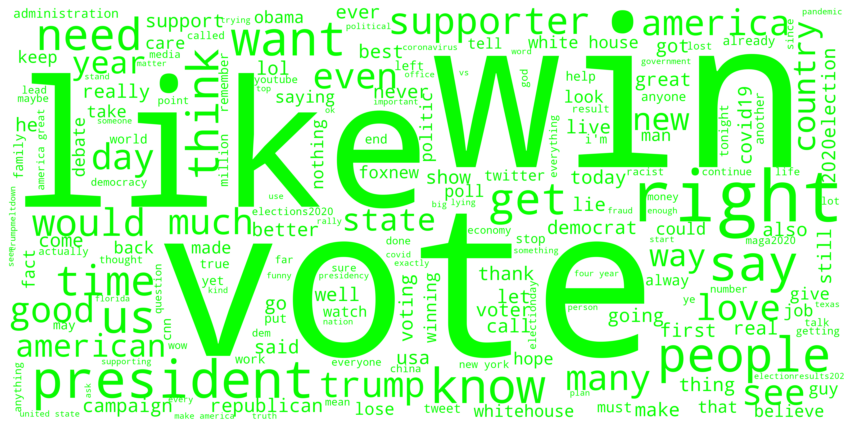

In [ ]:
# Trump - Palavras por sentimentos POSITIVOS

#change the value in return to set the single color need, in hsl format.
def p_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(118,100%%, %d%%)" % np.random.randint(49,51))

# Start with one review:
text = " ".join(s.lower() for s in trump[trump['Expression Label'] == 'positive']['tweet'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop, max_font_size=100, max_words=200, scale=10, relative_scaling=.6, background_color="white", colormap = "rainbow").generate(text)

#change the color setting
wordcloud.recolor(color_func = p_color_func)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

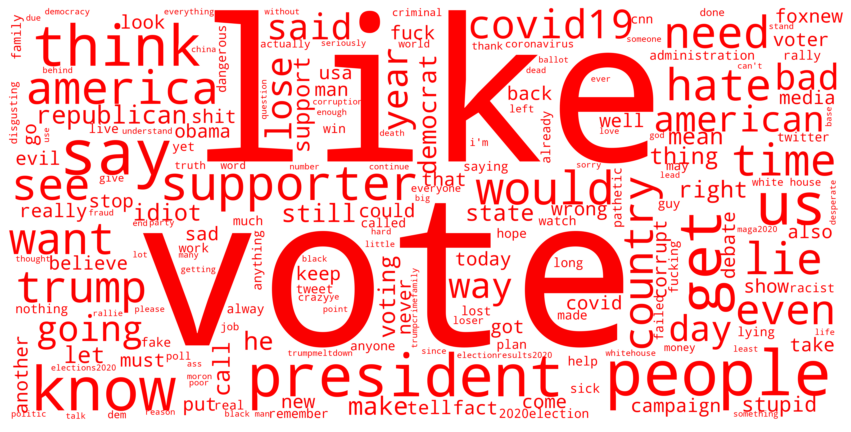

In [ ]:
# Trump - Palavras por sentimentos NEGATIVOS

#change the value in return to set the single color need, in hsl format.
def n_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0, 100%%, %d%%)" % np.random.randint(49,51))

# Start with one review:
text = " ".join(s.lower() for s in trump[trump['Expression Label'] == 'negative']['tweet'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop, max_font_size=100, max_words=200, scale=10, relative_scaling=.6, background_color="white", colormap = "rainbow").generate(text)

#change the color setting
wordcloud.recolor(color_func = n_color_func)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

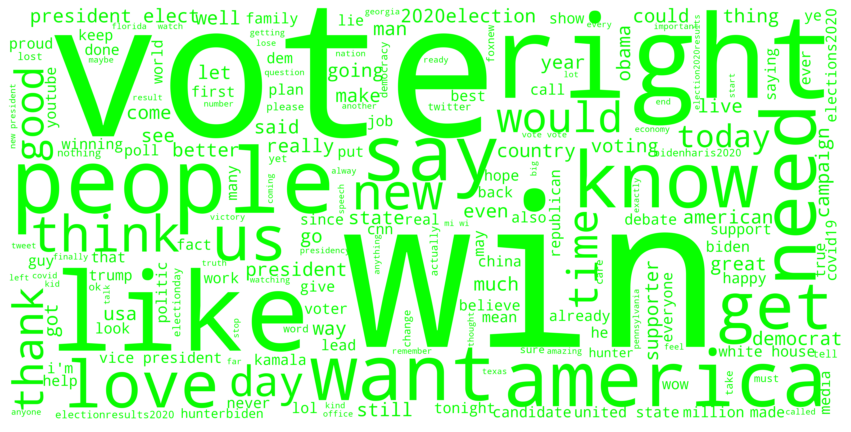

In [ ]:
# Biden - Palavras por sentimentos POSITIVOS

# Start with one review:
text = " ".join(s.lower() for s in biden[biden['Expression Label'] == 'positive']['tweet'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop, max_font_size=100, max_words=200, scale=10, relative_scaling=.6, background_color="white", colormap = "rainbow").generate(text)

#change the color setting
wordcloud.recolor(color_func = p_color_func)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

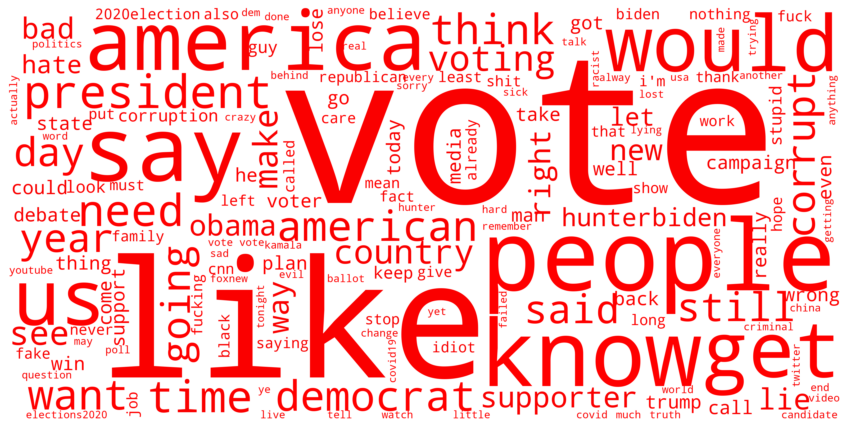

In [ ]:
# Biden - Palavras por sentimentos NEGATIVO

# Start with one review:
text = " ".join(s.lower() for s in biden[biden['Expression Label'] == 'negative']['tweet'])

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop, max_font_size=100, max_words=200, scale=10, relative_scaling=.6, background_color="white", colormap = "rainbow").generate(text)

#change the color setting
wordcloud.recolor(color_func = n_color_func)

# Display the generated image:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Qual a palavra que mais aparece para o Biden e para o Trump?

In [ ]:
#Top Biden Words
filtered_bd = df_biden[df_biden['country'] == 'US']['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop) ]))
filtered_bd_df = pd.DataFrame(filtered_bd)
topwords_biden = filtered_bd_df['tweet'].str.split(expand=True).stack().value_counts().rename_axis('Palavra').reset_index(name='Nº de ocorrências')
topwords_biden.head(10)

,Palavra,Nº de ocorrências
0,vote,8710
1,like,7863
2,get,6309
3,President,6285
4,people,5923
5,would,5841
6,going,4826
7,know,4818
8,need,3965
9,think,3680


In [ ]:
#Top Trump Words
filtered_tp = df_trump[df_trump['country'] == 'US']['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
filtered_tp_df = pd.DataFrame(filtered_tp)
topwords_trump = filtered_tp_df['tweet'].str.split(expand=True).stack().value_counts().rename_axis('Palavra').reset_index(name='Nº de ocorrências')
topwords_trump.head(10)

,Palavra,Nº de ocorrências
0,like,11460
1,people,9014
2,vote,8160
3,would,7550
4,get,7428
5,President,6285
6,know,6060
7,going,6046
8,think,4931
9,want,4413
